# NB from sklearn library

In [80]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy.stats import norm

In [81]:
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')\
       .drop(['Booking_ID'], axis='columns')
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [82]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

In [83]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,1,0,0,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,1,0,0,48,2018,4,11,1,0,0,0,94.50,0,1


'canceled'=1, 'not canceled'=0

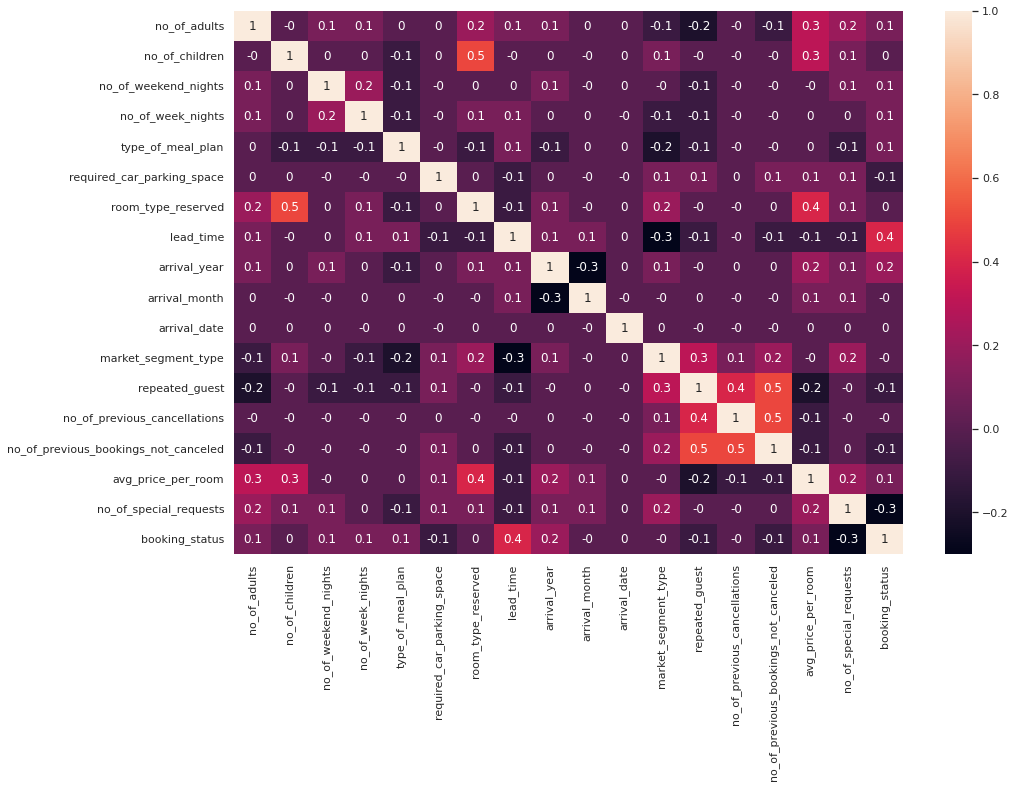

In [84]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(round(df.corr(), 1), annot=True);

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1],
                                                    test_size=0.2)

In [86]:
model = GaussianNB()
model.fit(X_train, y_train)
accuracy = metrics.accuracy_score(model.predict(X_test), y_test)
print(f"Test accuracy = {accuracy}")

Test accuracy = 0.4332184700206754


# NB from scratch

In [87]:
columns_means = X_train.groupby(y_train).agg('mean')
columns_stds = X_train.groupby(y_train).agg('std')
apriori_probs = X_train.groupby(y_train).apply(lambda x: len(x) / X_train.shape[0])
apriori_probs

booking_status
0    0.673156
1    0.326844
dtype: float64

In [88]:
labels = [0, 1]
predictions = []
for elem_index in range(X_test.shape[0]):
    temp_pred = np.array([0., 0.])
    for label in labels:
        temp_pred[label] = apriori_probs.iloc[label]
        for col_index, col_name in enumerate(X_test.iloc[elem_index]):
            temp_pred[label] *= norm.pdf(
                col_name,
                columns_means.iloc[label, col_index],
                columns_stds.iloc[label, col_index]
            )
    predictions.append(temp_pred.argmax())

In [89]:
print(f"accuracy - {metrics.accuracy_score(y_test, predictions)}")

accuracy - 0.4332184700206754
